<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

# Model 6

* 5 layers
* 178 units, he_normal, relu
* BatchNormalization
* Adam(0.001)
* epochs 100
* batch_size 500
<br><br>
* layer의 층을 줄이고 units의 수를 일정하게 유지시켜 Model 5보다 단순한 모델로 시험
* Model 5보다 성능이 떨어짐

In [0]:
# 케라스를 통해 모델 생성을 시작합니다.

model_06 = Sequential()
model_06.add(Dense(units= 178, input_dim=226, kernel_initializer='he_normal'))
model_06.add(BatchNormalization())
model_06.add(Activation('relu'))
model_06.add(Dense(units=178, kernel_initializer='he_normal'))
model_06.add(BatchNormalization())
model_06.add(Activation('relu'))
model_06.add(Dense(units=178, kernel_initializer='he_normal'))
model_06.add(BatchNormalization())
model_06.add(Activation('relu'))
model_06.add(Dense(units=178, kernel_initializer='he_normal'))
model_06.add(BatchNormalization())
model_06.add(Activation('relu'))
model_06.add(Dense(units=4, activation='linear'))

adam = keras.optimizers.Adam(0.001)
model_06.compile(loss='mae', optimizer=adam, metrics=['mae'])

hist = model_06.fit(train_X, train_Y, epochs=100, batch_size=500, validation_split=0.05)










Train on 769500 samples, validate on 40500 samples
Epoch 1/100





769500/769500 [==============================] - 42s 54us/step - loss: 68.9270 - mean_absolute_error: 68.9270 - val_loss: 50.2835 - val_mean_absolute_error: 50.2835
Epoch 2/100
769500/769500 [==============================] - 40s 52us/step - loss: 27.0310 - mean_absolute_error: 27.0310 - val_loss: 38.4321 - val_mean_absolute_error: 38.4321
Epoch 3/100
769500/769500 [==============================] - 41s 53us/step - loss: 21.4843 - mean_absolute_error: 21.4843 - val_loss: 38.8638 - val_mean_absolute_error: 38.8638
Epoch 4/100
769500/769500 [==============================] - 40s 52us/step - loss: 19.0252 - mean_absolute_error: 19.0252 - val_loss: 35.2921 - val_mean_absolute_error: 35.2921
Epoch 5/100
769500/769500 [==============================] - 40s 51us/step - loss: 17.3732 - mean_absolute_error: 17.3732 - val_loss: 34.8820 - val_mean_absolute_error: 34.8820
Epoch 6/100
769500/769500 [=======================

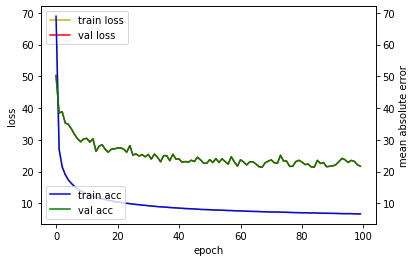

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train acc')
acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test_06 = model_06.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test_06
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_06.csv')